## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [7]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [8]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [9]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [10]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [12]:
"""
設定要訓練的 Epoch 數
"""
epochs = 500
model.fit(x_train, y_train, 
          epochs=epochs, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 38s 753us/step - loss: 1.9435 - accuracy: 0.2995 - val_loss: 1.8209 - val_accuracy: 0.3474
Epoch 2/500
50000/50000 [==============================] - 34s 670us/step - loss: 1.7224 - accuracy: 0.3825 - val_loss: 1.6834 - val_accuracy: 0.4026
Epoch 3/500
50000/50000 [==============================] - 31s 617us/step - loss: 1.6322 - accuracy: 0.4159 - val_loss: 1.6093 - val_accuracy: 0.4279
Epoch 4/500
50000/50000 [==============================] - 31s 628us/step - loss: 1.5566 - accuracy: 0.4441 - val_loss: 1.5898 - val_accuracy: 0.4253
Epoch 5/500
50000/50000 [==============================] - 30s 607us/step - loss: 1.5120 - accuracy: 0.4588 - val_loss: 1.4938 - val_accuracy: 0.4693
Epoch 6/500
50000/50000 [==============================] - 32s 650us/step - loss: 1.4746 - accuracy: 0.4724 - val_loss: 1.4761 - val_accuracy: 0.4753
Epoch 7/500
50000/50000 [=========================

Epoch 55/500
50000/50000 [==============================] - 37s 739us/step - loss: 0.5765 - accuracy: 0.7941 - val_loss: 1.9318 - val_accuracy: 0.5058
Epoch 56/500
50000/50000 [==============================] - 33s 660us/step - loss: 0.5781 - accuracy: 0.7907 - val_loss: 2.0338 - val_accuracy: 0.5059
Epoch 57/500
50000/50000 [==============================] - 33s 657us/step - loss: 0.5569 - accuracy: 0.8019 - val_loss: 1.9713 - val_accuracy: 0.5072
Epoch 58/500
50000/50000 [==============================] - 34s 678us/step - loss: 0.5587 - accuracy: 0.7982 - val_loss: 2.0463 - val_accuracy: 0.5000
Epoch 59/500
50000/50000 [==============================] - 35s 698us/step - loss: 0.5498 - accuracy: 0.8008 - val_loss: 2.0688 - val_accuracy: 0.5058
Epoch 60/500
50000/50000 [==============================] - 32s 644us/step - loss: 0.5307 - accuracy: 0.8099 - val_loss: 2.1292 - val_accuracy: 0.5109
Epoch 61/500
50000/50000 [==============================] - 34s 675us/step - loss: 0.5204 - ac

50000/50000 [==============================] - 23s 451us/step - loss: 0.3104 - accuracy: 0.8884 - val_loss: 3.5679 - val_accuracy: 0.4868
Epoch 110/500
50000/50000 [==============================] - 23s 452us/step - loss: 0.2641 - accuracy: 0.9046 - val_loss: 3.4990 - val_accuracy: 0.4901
Epoch 111/500
50000/50000 [==============================] - 22s 449us/step - loss: 0.2451 - accuracy: 0.9123 - val_loss: 3.7620 - val_accuracy: 0.4939
Epoch 112/500
50000/50000 [==============================] - 23s 464us/step - loss: 0.2454 - accuracy: 0.9127 - val_loss: 3.6643 - val_accuracy: 0.4842
Epoch 113/500
50000/50000 [==============================] - 22s 450us/step - loss: 0.2788 - accuracy: 0.8997 - val_loss: 3.5541 - val_accuracy: 0.4918
Epoch 114/500
50000/50000 [==============================] - 23s 458us/step - loss: 0.2617 - accuracy: 0.9059 - val_loss: 3.7235 - val_accuracy: 0.4925
Epoch 115/500
50000/50000 [==============================] - 22s 445us/step - loss: 0.2494 - accuracy:

Epoch 163/500
50000/50000 [==============================] - 17s 331us/step - loss: 0.1943 - accuracy: 0.9310 - val_loss: 4.7297 - val_accuracy: 0.4853
Epoch 164/500
50000/50000 [==============================] - 16s 319us/step - loss: 0.1832 - accuracy: 0.9344 - val_loss: 4.8423 - val_accuracy: 0.4952
Epoch 165/500
50000/50000 [==============================] - 15s 305us/step - loss: 0.1651 - accuracy: 0.9410 - val_loss: 4.9659 - val_accuracy: 0.4862
Epoch 166/500
50000/50000 [==============================] - 15s 306us/step - loss: 0.1692 - accuracy: 0.9401 - val_loss: 4.8614 - val_accuracy: 0.4880
Epoch 167/500
50000/50000 [==============================] - 15s 309us/step - loss: 0.1805 - accuracy: 0.9366 - val_loss: 4.7986 - val_accuracy: 0.4894
Epoch 168/500
50000/50000 [==============================] - 15s 305us/step - loss: 0.2131 - accuracy: 0.9261 - val_loss: 4.9518 - val_accuracy: 0.4978
Epoch 169/500
50000/50000 [==============================] - 15s 306us/step - loss: 0.17

50000/50000 [==============================] - 9s 181us/step - loss: 0.1124 - accuracy: 0.9601 - val_loss: 5.7378 - val_accuracy: 0.4930
Epoch 218/500
50000/50000 [==============================] - 9s 179us/step - loss: 0.1501 - accuracy: 0.9475 - val_loss: 5.7219 - val_accuracy: 0.4847
Epoch 219/500
50000/50000 [==============================] - 9s 174us/step - loss: 0.1349 - accuracy: 0.9530 - val_loss: 6.0144 - val_accuracy: 0.4872
Epoch 220/500
50000/50000 [==============================] - 9s 176us/step - loss: 0.1279 - accuracy: 0.9553 - val_loss: 5.9154 - val_accuracy: 0.4933
Epoch 221/500
50000/50000 [==============================] - 9s 176us/step - loss: 0.1432 - accuracy: 0.9502 - val_loss: 6.1166 - val_accuracy: 0.4843
Epoch 222/500
50000/50000 [==============================] - 9s 176us/step - loss: 0.1427 - accuracy: 0.9508 - val_loss: 5.8615 - val_accuracy: 0.4943
Epoch 223/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.1672 - accuracy: 0.9411

50000/50000 [==============================] - 15s 302us/step - loss: 0.0645 - accuracy: 0.9769 - val_loss: 6.3646 - val_accuracy: 0.4927
Epoch 272/500
50000/50000 [==============================] - 15s 310us/step - loss: 0.1327 - accuracy: 0.9565 - val_loss: 6.7222 - val_accuracy: 0.4769
Epoch 273/500
50000/50000 [==============================] - 15s 300us/step - loss: 0.2355 - accuracy: 0.9264 - val_loss: 6.5499 - val_accuracy: 0.4819
Epoch 274/500
50000/50000 [==============================] - 15s 307us/step - loss: 0.1340 - accuracy: 0.9538 - val_loss: 6.6826 - val_accuracy: 0.4886
Epoch 275/500
50000/50000 [==============================] - 15s 302us/step - loss: 0.0642 - accuracy: 0.9779 - val_loss: 6.5942 - val_accuracy: 0.4888
Epoch 276/500
50000/50000 [==============================] - 17s 334us/step - loss: 0.0582 - accuracy: 0.9798 - val_loss: 6.8300 - val_accuracy: 0.4829
Epoch 277/500
50000/50000 [==============================] - 16s 317us/step - loss: 0.0726 - accuracy:

Epoch 325/500
50000/50000 [==============================] - 15s 309us/step - loss: 0.0465 - accuracy: 0.9844 - val_loss: 7.0310 - val_accuracy: 0.4939
Epoch 326/500
50000/50000 [==============================] - 15s 308us/step - loss: 0.0622 - accuracy: 0.9777 - val_loss: 7.1028 - val_accuracy: 0.4892
Epoch 327/500
50000/50000 [==============================] - 15s 305us/step - loss: 0.1271 - accuracy: 0.9579 - val_loss: 7.2004 - val_accuracy: 0.4897
Epoch 328/500
50000/50000 [==============================] - 15s 308us/step - loss: 0.2006 - accuracy: 0.9375 - val_loss: 6.9457 - val_accuracy: 0.4827
Epoch 329/500
50000/50000 [==============================] - 15s 309us/step - loss: 0.1498 - accuracy: 0.9520 - val_loss: 6.8933 - val_accuracy: 0.4867
Epoch 330/500
50000/50000 [==============================] - 16s 312us/step - loss: 0.0961 - accuracy: 0.9673 - val_loss: 7.1313 - val_accuracy: 0.4949
Epoch 331/500
50000/50000 [==============================] - 16s 312us/step - loss: 0.05

50000/50000 [==============================] - 19s 374us/step - loss: 0.0840 - accuracy: 0.9718 - val_loss: 7.4589 - val_accuracy: 0.4855
Epoch 388/500
50000/50000 [==============================] - 18s 364us/step - loss: 0.0959 - accuracy: 0.9685 - val_loss: 7.2383 - val_accuracy: 0.4856
Epoch 389/500
50000/50000 [==============================] - 18s 366us/step - loss: 0.1252 - accuracy: 0.9591 - val_loss: 7.1805 - val_accuracy: 0.4864
Epoch 390/500
50000/50000 [==============================] - 18s 359us/step - loss: 0.1052 - accuracy: 0.9644 - val_loss: 7.2917 - val_accuracy: 0.4886
Epoch 391/500
50000/50000 [==============================] - 18s 353us/step - loss: 0.0617 - accuracy: 0.9790 - val_loss: 7.3541 - val_accuracy: 0.4929
Epoch 392/500
50000/50000 [==============================] - 18s 359us/step - loss: 0.0427 - accuracy: 0.9863 - val_loss: 7.5425 - val_accuracy: 0.4937
Epoch 393/500
50000/50000 [==============================] - 18s 359us/step - loss: 0.0961 - accuracy:

50000/50000 [==============================] - 8s 169us/step - loss: 0.0056 - accuracy: 0.9992 - val_loss: 7.7064 - val_accuracy: 0.5001
Epoch 442/500
50000/50000 [==============================] - 8s 169us/step - loss: 0.0059 - accuracy: 0.9991 - val_loss: 7.7791 - val_accuracy: 0.5014
Epoch 443/500
50000/50000 [==============================] - 8s 170us/step - loss: 0.7475 - accuracy: 0.8405 - val_loss: 6.5183 - val_accuracy: 0.4760
Epoch 444/500
50000/50000 [==============================] - 8s 166us/step - loss: 0.1447 - accuracy: 0.9539 - val_loss: 6.5100 - val_accuracy: 0.4939
Epoch 445/500
50000/50000 [==============================] - 8s 168us/step - loss: 0.0540 - accuracy: 0.9829 - val_loss: 6.6239 - val_accuracy: 0.4998
Epoch 446/500
50000/50000 [==============================] - 8s 166us/step - loss: 0.0192 - accuracy: 0.9957 - val_loss: 6.8554 - val_accuracy: 0.5003
Epoch 447/500
50000/50000 [==============================] - 8s 166us/step - loss: 0.0111 - accuracy: 0.9984

50000/50000 [==============================] - 9s 173us/step - loss: 0.0042 - accuracy: 0.9998 - val_loss: 6.8509 - val_accuracy: 0.4985
Epoch 496/500
50000/50000 [==============================] - 9s 172us/step - loss: 0.5358 - accuracy: 0.8713 - val_loss: 5.8023 - val_accuracy: 0.4722
Epoch 497/500
50000/50000 [==============================] - 9s 173us/step - loss: 0.1734 - accuracy: 0.9434 - val_loss: 5.7577 - val_accuracy: 0.4887
Epoch 498/500
50000/50000 [==============================] - 9s 176us/step - loss: 0.0482 - accuracy: 0.9848 - val_loss: 5.8346 - val_accuracy: 0.4981
Epoch 499/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.0187 - accuracy: 0.9963 - val_loss: 6.1654 - val_accuracy: 0.5014
Epoch 500/500
50000/50000 [==============================] - 9s 173us/step - loss: 0.0093 - accuracy: 0.9992 - val_loss: 6.2664 - val_accuracy: 0.5038


In [13]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [14]:
#SGD
from keras import optimizers

opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [15]:
epochs = 100
model.fit(x_train, y_train, 
          epochs=epochs, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 140us/step - loss: 1.8852 - accuracy: 0.3249 - val_loss: 1.7259 - val_accuracy: 0.3837
Epoch 2/100
50000/50000 [==============================] - 7s 137us/step - loss: 1.6501 - accuracy: 0.4142 - val_loss: 1.6042 - val_accuracy: 0.4351
Epoch 3/100
50000/50000 [==============================] - 7s 136us/step - loss: 1.5616 - accuracy: 0.4472 - val_loss: 1.5621 - val_accuracy: 0.4518
Epoch 4/100
50000/50000 [==============================] - 7s 137us/step - loss: 1.4996 - accuracy: 0.4649 - val_loss: 1.5110 - val_accuracy: 0.4547
Epoch 5/100
50000/50000 [==============================] - 7s 134us/step - loss: 1.4481 - accuracy: 0.4860 - val_loss: 1.4547 - val_accuracy: 0.4861
Epoch 6/100
50000/50000 [==============================] - 7s 136us/step - loss: 1.4056 - accuracy: 0.5014 - val_loss: 1.5045 - val_accuracy: 0.4644
Epoch 7/100
50000/50000 [==============================]

50000/50000 [==============================] - 7s 140us/step - loss: 0.3554 - accuracy: 0.8728 - val_loss: 2.2588 - val_accuracy: 0.5289
Epoch 56/100
50000/50000 [==============================] - 7s 137us/step - loss: 0.3266 - accuracy: 0.8874 - val_loss: 2.4495 - val_accuracy: 0.5032
Epoch 57/100
50000/50000 [==============================] - 7s 138us/step - loss: 0.3301 - accuracy: 0.8838 - val_loss: 2.1583 - val_accuracy: 0.5310
Epoch 58/100
50000/50000 [==============================] - 7s 137us/step - loss: 0.3049 - accuracy: 0.8940 - val_loss: 2.2578 - val_accuracy: 0.5347
Epoch 59/100
50000/50000 [==============================] - 7s 138us/step - loss: 0.3014 - accuracy: 0.8949 - val_loss: 2.3845 - val_accuracy: 0.5231
Epoch 60/100
50000/50000 [==============================] - 7s 137us/step - loss: 0.2919 - accuracy: 0.8966 - val_loss: 2.7138 - val_accuracy: 0.4902
Epoch 61/100
50000/50000 [==============================] - 7s 139us/step - loss: 0.2913 - accuracy: 0.8970 - val

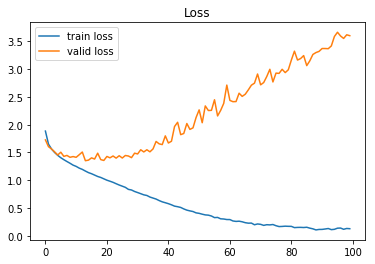

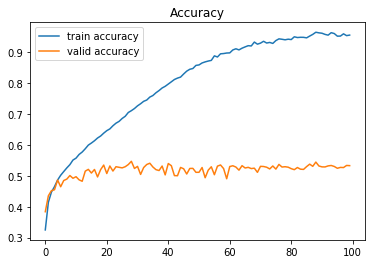

In [16]:
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()